<a href="https://colab.research.google.com/github/CristovamOliver/Web-Scraping/blob/develop/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## WEB SCRAPING + DATA CLEANING: 'BREAKING BAD'

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## WEB SCRAPING IMDB

In [ ]:

lista_episodios = [] 

for tp in range(1, 9): 
  url = requests.get(f'https://www.imdb.com/title/tt0903747/episodes?season={tp}')
  soup = BeautifulSoup(url.text, 'html.parser')
  episodio_container = soup.find_all('div', class_ = 'info')


  #Buscando as informações de interesse em todos episódios de todas as temporadas
  for episodio in episodio_container:
    temporada = tp
    episode_number = episodio.meta['content']
    title = episodio.a['title']
    airdate = episodio.find('div', class_='airdate').text.strip()
    rating = episodio.find('span', class_='ipl-rating-star__rating').text.strip()
    total_votes = episodio.find('span', class_='ipl-rating-star__total-votes').text.strip()
    desc = episodio.find('div',class_='item_description').text.strip()
    episode_data = [temporada, episode_number, title, airdate, rating, total_votes, desc]
    lista_episodios.append(episode_data)
# lista_episodios


In [ ]:
lista_episodios = pd.DataFrame(lista_episodios, columns = ['season', 'episode_number', 'title', 'airdate', 'rating', 'total_votes', 'desc'])  
lista_episodios

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,20 Jan. 2008,9.0,"(36,651)","Diagnosed with terminal lung cancer, chemistry..."
1,1,2,Cat's in the Bag...,27 Jan. 2008,8.6,"(26,741)",After their first drug deal goes terribly wron...
2,1,3,...And the Bag's in the River,10 Feb. 2008,8.7,"(25,911)",Walt and Jesse clean up after the bathtub inci...
3,1,4,Cancer Man,17 Feb. 2008,8.2,"(24,964)",Walt tells the rest of his family about his ca...
4,1,5,Gray Matter,24 Feb. 2008,8.3,"(24,526)",Walt rejects everyone who tries to help him wi...
...,...,...,...,...,...,...,...
105,8,12,Rabid Dog,1 Sep. 2013,9.1,"(27,734)",Walt discovers Jesse broke into his house and ...
106,8,13,To'hajiilee,8 Sep. 2013,9.8,"(46,970)",Jesse and Hank come up with an idea to take Wa...
107,8,14,Ozymandias,15 Sep. 2013,10.0,"(184,949)",Walt goes on the run. Jesse is taken hostage. ...
108,8,15,Granite State,22 Sep. 2013,9.6,"(46,225)",Walt struggles as he adapts to aspects of his ...


## WEB SCRAPING WIKIPEDIA



In [ ]:
# get the response in the form of html
url = "https://en.wikipedia.org/wiki/List_of_awards_and_nominations_received_by_Breaking_Bad"
table_class = "wikitable sortable plainrowheaders jquery-tablesorter"
response = requests.get(url)
print(response.status_code)

200


In [ ]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table',{'class':"wikitable"})

In [ ]:
df = pd.read_html(str(table))

df = pd.DataFrame(df[0])
df

,Award,Year[b],Category,Nominee(s),Result,Ref.
0,3D Creative Arts Awards,2014,Best 4K Lumiere – Entertainment,Breaking Bad,Won,[18]
1,American Cinema Editors Awards,2009,Best Edited One-Hour Series for Commercial Tel...,"Lynne Willingham (for ""Pilot"")",Won,[19][20]
2,American Cinema Editors Awards,2010,Best Edited One-Hour Series for Commercial Tel...,"Lynne Willingham (for ""ABQ"")",Won,[21][22]
3,American Cinema Editors Awards,2011,Best Edited One-Hour Series for Commercial Tel...,"Kelley Dixon (for ""Sunset"")",Nominated,[23][24]
4,American Cinema Editors Awards,2012,Best Edited One-Hour Series for Commercial Tel...,"Skip Macdonald (for ""Face Off"")",Won,[25][26]
...,...,...,...,...,...,...
243,Writers Guild of America Awards,2013,Best Episodic Drama,"Thomas Schnauz (for ""Say My Name"")",Nominated,[214][215]
244,Writers Guild of America Awards,2014,Best Dramatic Series,Breaking Bad[p],Won,[216][217]
245,Writers Guild of America Awards,2014,Best Episodic Drama,"Gennifer Hutchison (for ""Confessions"")",Won,[216][217]
246,Writers Guild of America Awards,2014,Best Episodic Drama,"Thomas Schnauz (for ""Buried"")",Nominated,[216][217]


## DATA CLEANING

In [ ]:
lista_episodios

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,20 Jan. 2008,9.0,"(36,651)","Diagnosed with terminal lung cancer, chemistry..."
1,1,2,Cat's in the Bag...,27 Jan. 2008,8.6,"(26,741)",After their first drug deal goes terribly wron...
2,1,3,...And the Bag's in the River,10 Feb. 2008,8.7,"(25,911)",Walt and Jesse clean up after the bathtub inci...
3,1,4,Cancer Man,17 Feb. 2008,8.2,"(24,964)",Walt tells the rest of his family about his ca...
4,1,5,Gray Matter,24 Feb. 2008,8.3,"(24,526)",Walt rejects everyone who tries to help him wi...
...,...,...,...,...,...,...,...
105,8,12,Rabid Dog,1 Sep. 2013,9.1,"(27,734)",Walt discovers Jesse broke into his house and ...
106,8,13,To'hajiilee,8 Sep. 2013,9.8,"(46,970)",Jesse and Hank come up with an idea to take Wa...
107,8,14,Ozymandias,15 Sep. 2013,10.0,"(184,949)",Walt goes on the run. Jesse is taken hostage. ...
108,8,15,Granite State,22 Sep. 2013,9.6,"(46,225)",Walt struggles as he adapts to aspects of his ...


In [ ]:
lista_episodios['rating'].astype

<bound method NDFrame.astype of 0       9.0
1       8.6
2       8.7
3       8.2
4       8.3
       ... 
105     9.1
106     9.8
107    10.0
108     9.6
109     9.9
Name: rating, Length: 110, dtype: object>

In [ ]:
lista_episodios['rating'] = pd.to_numeric(lista_episodios['rating'], downcast="float") #making 'rating' numeric 

In [ ]:
lista_episodios['episode_number'] = pd.to_numeric(lista_episodios['episode_number'], downcast="integer") #making 'episode_number' numeric 

In [ ]:
bd = lista_episodios.pivot(index='season', columns='episode_number', values='rating') #creating a pivot table

Text(0.5, 1.0, 'Breaking Bad - IMDb rating')

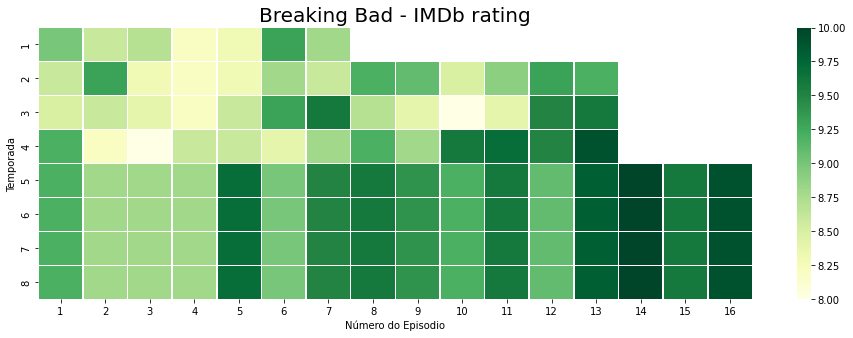

In [ ]:
plt.figure(figsize = (16,5))

ax = sns.heatmap(bd,  cmap="YlGn", linewidths=.5, vmin=8.0, vmax=10.0)

plt.xlabel("Número do Episodio", fontsize = 10) 
plt.ylabel("Temporada", fontsize = 10) 
ax.set_title('Breaking Bad - IMDb rating', fontsize = 20)l